## Bonus Assignment

In [1]:
toyota.df <- read.csv("ToyotaCorolla.csv") 

In [2]:
head(toyota.df[,"Cylinders"])

[1] 4 4 4 4 4 4

We want to build a regression model for Price

In [3]:
dim(toyota.df)

[1] 1436   38

In [4]:
set.seed(1)  # set seed for reproducing the partition
drops <- c("Model","Id", "Mfg_Year", "Cylinders")
toyota.df <- toyota.df[ , !(names(toyota.df) %in% drops)]

X = model.matrix(toyota.df$Price~., toyota.df)[,-1]
y = array(toyota.df$Price, dim = c(dim(toyota.df)[1], 1))

train.index <- sample(dim(toyota.df)[1], dim(toyota.df)[1]*2/3)


X.train <- as.data.frame(X[train.index, ])
y.train <- as.data.frame(y[train.index, ])
X.test <- as.data.frame(X[-train.index, ])
y.test <- as.data.frame(y[-train.index, ])

train.df <- data.frame(X.train, y.train)
names(train.df)[ncol(train.df)] <- 'Price'

valid.df <- data.frame(X.test, y.test)
names(valid.df)[ncol(valid.df)] <- 'Price'

In [5]:
dim(train.df)
#train.df

[1] 957  43

In [6]:
dim(valid.df)

[1] 479  43

In [7]:
toyota.lm <- lm(Price ~ ., data = train.df)

In [8]:
summary(toyota.lm)


Call:
lm(formula = Price ~ ., data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7580.9  -627.3    -6.0   642.9  5283.4 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.086e+02  1.921e+03   0.213 0.831573    
Age_08_04        -1.171e+02  4.330e+00 -27.042  < 2e-16 ***
Mfg_Month        -8.516e+01  1.135e+01  -7.503 1.48e-13 ***
KM               -1.585e-02  1.467e-03 -10.799  < 2e-16 ***
Fuel_TypeDiesel   1.254e+03  4.550e+02   2.757 0.005954 ** 
Fuel_TypePetrol   2.519e+03  4.679e+02   5.385 9.21e-08 ***
HP                2.177e+01  3.961e+00   5.496 5.04e-08 ***
Met_Color         1.513e+01  8.892e+01   0.170 0.864951    
ColorBlack        5.295e+02  6.621e+02   0.800 0.424076    
ColorBlue         5.735e+02  6.618e+02   0.867 0.386381    
ColorGreen        2.512e+02  6.639e+02   0.378 0.705260    
ColorGrey         6.698e+02  6.621e+02   1.012 0.312033    
ColorRed          2.930e+02  6.621e+02   0.443 0.658158    
Col

## Subset Selection

### Best Subset

In [9]:
if (!require(leaps)) install.packages("leaps")
if (!require(leaps)) install.packages("forecast")

Loading required package: leaps



In [10]:
toyota.lm.pred <- predict(toyota.lm, valid.df)

In [11]:
library(leaps)
regfit.full= regsubsets(Price~.,train.df)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Price ~ ., train.df)
42 Variables  (and intercept)
                 Forced in Forced out
Age_08_04            FALSE      FALSE
Mfg_Month            FALSE      FALSE
KM                   FALSE      FALSE
Fuel_TypeDiesel      FALSE      FALSE
Fuel_TypePetrol      FALSE      FALSE
HP                   FALSE      FALSE
Met_Color            FALSE      FALSE
ColorBlack           FALSE      FALSE
ColorBlue            FALSE      FALSE
ColorGreen           FALSE      FALSE
ColorGrey            FALSE      FALSE
ColorRed             FALSE      FALSE
ColorSilver          FALSE      FALSE
ColorViolet          FALSE      FALSE
ColorWhite           FALSE      FALSE
ColorYellow          FALSE      FALSE
Automatic            FALSE      FALSE
cc                   FALSE      FALSE
Doors                FALSE      FALSE
Gears                FALSE      FALSE
Quarterly_Tax        FALSE      FALSE
Weight               FALSE      FALSE
Mfr_Guarantee        FALSE

In [12]:
regfit.full= regsubsets(Price~.,train.df,nvmax=42)
reg.summary = summary(regfit.full)

[1] 0.7640069 0.8270878 0.8498775 0.8794431 0.8879736 0.8923323 0.8961415
 [8] 0.8995562 0.9016978 0.9032605 0.9046806 0.9056648 0.9066317 0.9073452
[15] 0.9080509 0.9086499 0.9093734 0.9100335 0.9105010 0.9109385 0.9113569
[22] 0.9117281 0.9120294 0.9123112 0.9125407 0.9127780 0.9129941 0.9131700
[29] 0.9133185 0.9134702 0.9135700 0.9136469 0.9137189 0.9137435 0.9137634
[36] 0.9137842 0.9137976 0.9138055 0.9138082 0.9138106 0.9138111 0.9138113

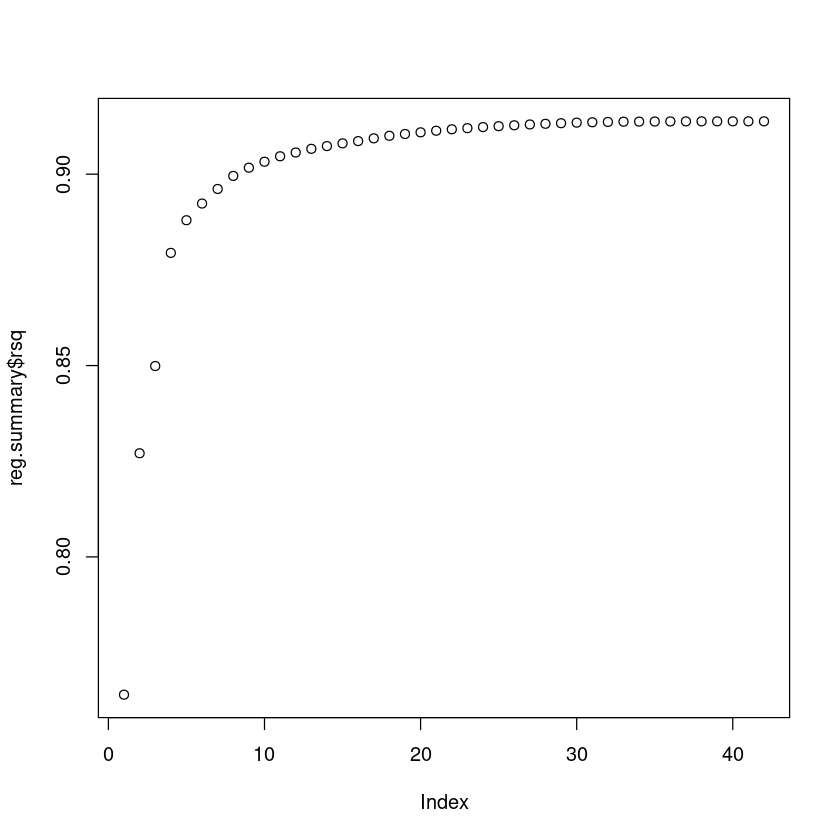

In [13]:
reg.summary$rsq 
plot(reg.summary$rsq)

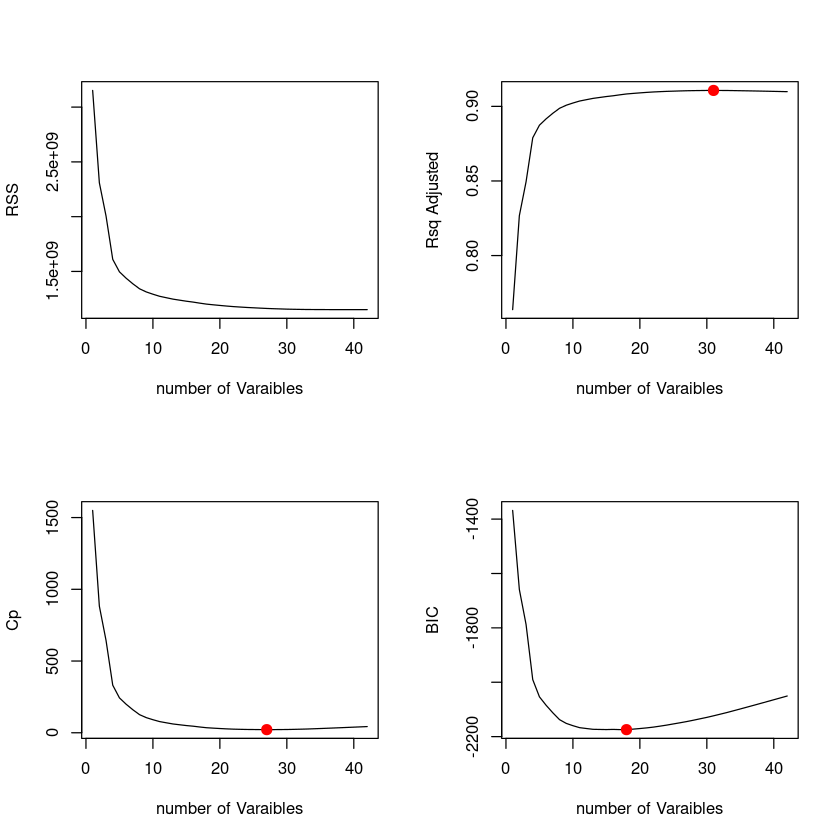

In [14]:
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab="number of Varaibles",ylab="RSS",type="l")
plot(reg.summary$adjr2, xlab="number of Varaibles",ylab="Rsq Adjusted",type="l")
ind<-which.max(reg.summary$adjr2)
points(ind,reg.summary$adjr2[ind],col="red",cex=2,pch=20) #plot a red dot at maximum Adjusted R2

plot(reg.summary$cp, xlab="number of Varaibles",ylab="Cp",type="l")
ind<-which.min(reg.summary$cp) # find the location of the minimum Cp
points(ind,reg.summary$cp[ind],col="red",cex=2,pch=20) #plot a red dot at minimum Cp

plot(reg.summary$bic, xlab="number of Varaibles",ylab="BIC",type="l")
ind<-which.min(reg.summary$bic) # find the location of the minimum BIC
points(ind,reg.summary$bic[ind],col="red",cex=2,pch=20) #plot a red dot at minimum BIC

In [15]:
# the best model options
which.min(reg.summary$bic)
which.min(reg.summary$cp)
which.max(reg.summary$adjr2)

[1] 18

[1] 27

[1] 31

In [16]:
best_num = which.min(reg.summary$bic)
best_num

[1] 18

### Coeffients
Finding the coefficients associated with the lowest rss based on bic (lowest number of variables).

In [17]:
# the coefficients associated with the lowest rss based on bic - with 18 variables
coef(regfit.full,best_num)

(Intercept)        Age_08_04        Mfg_Month               KM 
   -570.99854925    -112.49491287     -82.37724971      -0.01591849 
 Fuel_TypePetrol               HP       ColorGreen         ColorRed 
   1807.75503311      15.48568286    -323.86987187    -294.12794480 
      ColorWhite    Quarterly_Tax           Weight    Mfr_Guarantee 
   -913.21700865      16.35160405      12.83404616     210.97865459 
 BOVAG_Guarantee Guarantee_Period            Airco  Automatic_airco 
    468.59150842      52.45254704     342.27855653    2633.98821856 
     Sport_Model Backseat_Divider     Metallic_Rim 
    338.02178154    -402.92534861     271.80099267

## Forward and Backward Selection

In [18]:
regfit.fwd=regsubsets(Price~.,data=toyota.df,nvmax=42,method="forward")
fwd.summary=summary(regfit.fwd)
regfit.bwd=regsubsets(Price~.,data=toyota.df,nvmax=42,method="backward")
bwd.summary=summary(regfit.fwd)

In [19]:
#the best model options for forward selection
which.min(fwd.summary$bic)
which.min(fwd.summary$cp)
which.max(fwd.summary$adjr2)

[1] 19

[1] 26

[1] 29

In [20]:
#the best model options for backward selection
which.min(bwd.summary$bic)
which.min(bwd.summary$cp)
which.max(bwd.summary$adjr2)

[1] 19

[1] 26

[1] 29

### Coeffients
The number of variables for best models suggested by forward and backward selection are the same. We can then find the coefficients associated with the lowest rss based on bic (lowest number of variables). 

Even though both method use the same number of variables, the selection of variables and the coefficients are slightly different.

In [21]:
coef(regfit.fwd,which.min(fwd.summary$bic))

(Intercept)        Age_08_04        Mfg_Month               KM 
    526.46400739    -118.68762868     -96.72541515      -0.01649911 
 Fuel_TypePetrol               HP       ColorGreen       ColorWhite 
   1321.59200091      15.84498249    -276.61041219    -732.94999969 
   Quarterly_Tax           Weight    Mfr_Guarantee  BOVAG_Guarantee 
     12.41032777      12.87352984     208.60809397     460.96315628 
Guarantee_Period              ABS            Airco  Automatic_airco 
     76.87747968    -296.03188199     209.45906157    2467.28089622 
   Boardcomputer  Powered_Windows      Sport_Model          Tow_Bar 
   -310.33222240     350.03472553     228.17043850    -212.80135739

In [22]:
coef(regfit.bwd,which.min(bwd.summary$bic))

(Intercept)        Age_08_04        Mfg_Month               KM 
     91.75469215    -114.67059723     -93.80898960      -0.01633715 
 Fuel_TypePetrol               HP       ColorWhite    Quarterly_Tax 
   1535.74234037      13.86414357    -718.45401889      14.02748796 
          Weight    Mfr_Guarantee  BOVAG_Guarantee Guarantee_Period 
     12.95310179     215.90968799     522.95978473      69.23439176 
             ABS            Airco  Automatic_airco  Powered_Windows 
   -274.86696514     192.05986655    2436.33032224     322.21972291 
     Sport_Model Backseat_Divider     Metallic_Rim          Tow_Bar 
    321.67462897    -338.03834066     221.10877269    -207.06705379

## Ridge Regression 

In [23]:
x=scale(model.matrix(Price~.,toyota.df)[,-1]) #this creates a matrix of predictors, and converts all the categorical variables to dummy variables
# the [,-1] indexing removes the intercept from the matrix. We do this because it will be added back automatically in later methods
y=toyota.df$Price #create the response variable

In [24]:
head(x)

,Age_08_04,Mfg_Month,KM,Fuel_TypeDiesel,Fuel_TypePetrol,HP,Met_Color,ColorBlack,ColorBlue,ColorGreen,⋯,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1,-1.771349,1.3271141,-0.5744948,2.873806,-2.70993,-0.7677744,0.6939773,-0.3915441,2.0177631,-0.4252,⋯,0.8505207,0.8825459,0.1509177,-0.4137263,-0.5878678,-0.6546427,0.5460446,-0.5072118,-0.4125718,-0.6200773
2,-1.771349,1.3271141,0.1174129,2.873806,-2.70993,-0.7677744,0.6939773,-0.3915441,-0.4952532,-0.4252,⋯,0.8505207,-1.1322965,0.1509177,-0.4137263,-0.5878678,-0.6546427,0.5460446,-0.5072118,-0.4125718,-0.6200773
3,-1.717586,1.0289702,-0.7151373,2.873806,-2.70993,-0.7677744,0.6939773,-0.3915441,2.0177631,-0.4252,⋯,-1.1749316,-1.1322965,0.1509177,-0.4137263,-0.5878678,-0.6546427,0.5460446,-0.5072118,-0.4125718,-0.6200773
4,-1.610059,0.4326824,-0.5474594,2.873806,-2.70993,-0.7677744,-1.4399658,2.5522119,-0.4952532,-0.4252,⋯,-1.1749316,-1.1322965,0.1509177,-0.4137263,-0.5878678,-0.6546427,0.5460446,-0.5072118,-0.4125718,-0.6200773
5,-1.395005,-0.7598932,-0.8007492,2.873806,-2.70993,-0.7677744,-1.4399658,2.5522119,-0.4952532,-0.4252,⋯,0.8505207,0.8825459,0.1509177,-0.4137263,1.6998780,-0.6546427,0.5460446,-0.5072118,-0.4125718,-0.6200773
6,-1.287478,-1.3561810,-0.2008524,2.873806,-2.70993,-0.7677744,-1.4399658,-0.3915441,-0.4952532,-0.4252,⋯,0.8505207,0.8825459,0.1509177,-0.4137263,1.6998780,-0.6546427,0.5460446,-0.5072118,-0.4125718,-0.6200773


In [25]:
if (!require(glmnet)) install.packages("glmnet")
library(glmnet)

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.1-3



In [26]:
grid=10^seq(10,-2,length=100) #create grid values for lambda from 10^10 to 10^-2
ridge.mod=glmnet(x,y,alpha=0,lambda=grid) #implements ridge regression when alpha=0

In [27]:
dim(coef(ridge.mod))

[1]  43 100

In [38]:
predict(ridge.mod,s=100,type="coefficients")[1:43,] 

(Intercept)        Age_08_04        Mfg_Month               KM 
    10724.939265     -1931.580120      -248.689022      -663.000506 
 Fuel_TypeDiesel  Fuel_TypePetrol               HP        Met_Color 
      264.300720       360.517621       338.072057        25.690306 
      ColorBlack        ColorBlue       ColorGreen        ColorGrey 
       26.458692        50.192779       -28.262553       130.162860 
        ColorRed      ColorSilver      ColorViolet       ColorWhite 
      -47.693567        -6.521878        10.083882       -60.796694 
     ColorYellow        Automatic               cc            Doors 
      -16.421083        75.466918       -23.187786        97.034817 
           Gears    Quarterly_Tax           Weight    Mfr_Guarantee 
       18.603911       390.167263       578.032490       122.074127 
 BOVAG_Guarantee Guarantee_Period              ABS         Airbag_1 
      153.332194       181.893166        -3.557521       -37.123041 
        Airbag_2            Airco  Automatic_airco    Boardcomputer 
      -58.823065       130.167528       594.075025        12.074966 
       CD_Player     Central_Lock  Powered_Windows   Power_Steering 
      158.353322       -19.890062       123.061065        11.904345 
           Radio        Mistlamps      Sport_Model Backseat_Divider 
      107.787976        22.855742       216.142575      -113.242890 
    Metallic_Rim   Radio_cassette          Tow_Bar 
      116.638725      -130.821484       -86.995359

## predict - ridge

In [32]:
set.seed(1)
train=sample(1:nrow(x),nrow(x)/2) #generate a random index of half of the data, to use as training set
test=(-train) 
y.test=y[test] 

In [33]:
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid,thresh=1e-12) #estimate ridge regression on training data
ridge.pred=predict(ridge.mod,s=4,newx=x[test,]) #generate predicted values on test data using lambda=4 (note this use the predict funciton we wrote above)

In [34]:
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])

[1] 898.636

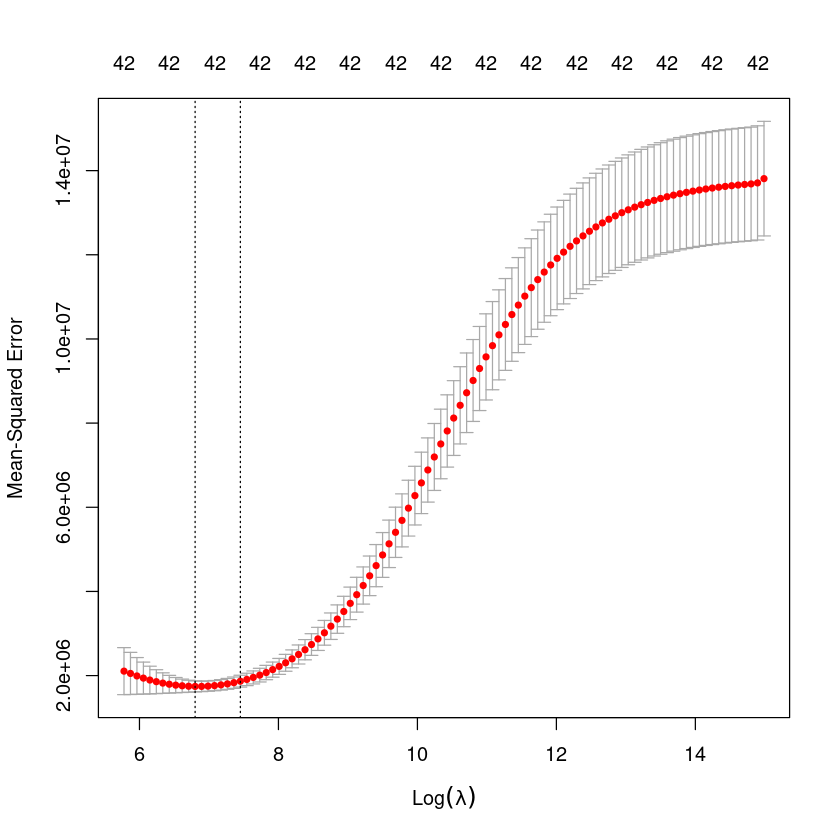

In [35]:
set.seed(1) # the choice of folds is random, so we want to set the seed to get reproduible results
cv.out=cv.glmnet(x[train,],y[train],alpha=0) #performs cross-validation, default is 10-fold
plot(cv.out)
bestlam=cv.out$lambda.min #find lambda with lowest MSE (cross-validation)
bestlam

In [36]:
#predicting using the best lambda
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])

In [37]:
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:43,]

(Intercept)        Age_08_04        Mfg_Month               KM 
    10730.824513     -1305.989609      -200.774363      -713.742696 
 Fuel_TypeDiesel  Fuel_TypePetrol               HP        Met_Color 
       31.200281        95.943731       267.872920       -30.659503 
      ColorBlack        ColorBlue       ColorGreen        ColorGrey 
       36.667953        21.186888       -85.624361        79.491971 
        ColorRed      ColorSilver      ColorViolet       ColorWhite 
      -34.414126        43.828806        -6.424505       -96.951732 
     ColorYellow        Automatic               cc            Doors 
        2.795468        55.225881        -5.634610        88.925380 
           Gears    Quarterly_Tax           Weight    Mfr_Guarantee 
       40.214232       298.617020       607.289558       133.859491 
 BOVAG_Guarantee Guarantee_Period              ABS         Airbag_1 
       86.310292       258.444572        44.366268        30.854331 
        Airbag_2            Airco  Automatic_airco    Boardcomputer 
        6.622185       182.886068       590.861671       261.467815 
       CD_Player     Central_Lock  Powered_Windows   Power_Steering 
      204.981821        66.235447       154.276499       -31.884355 
           Radio        Mistlamps      Sport_Model Backseat_Divider 
       23.490882       -48.589557       154.758745       -58.056387 
    Metallic_Rim   Radio_cassette          Tow_Bar 
       70.328706        15.122712      -129.456454

## predict - Lasso

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


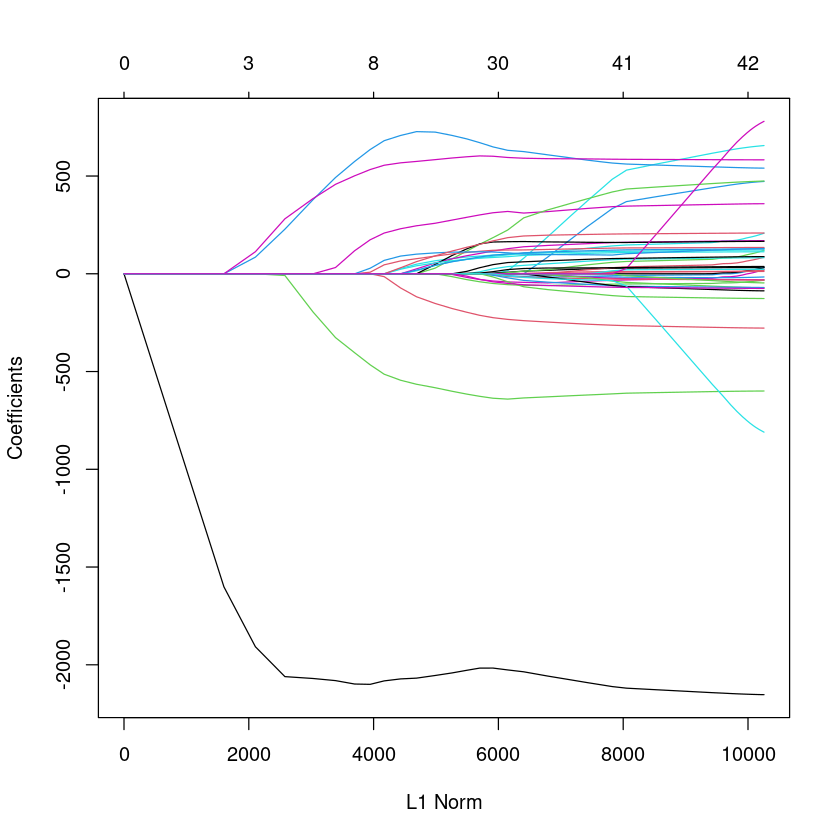

In [39]:
lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

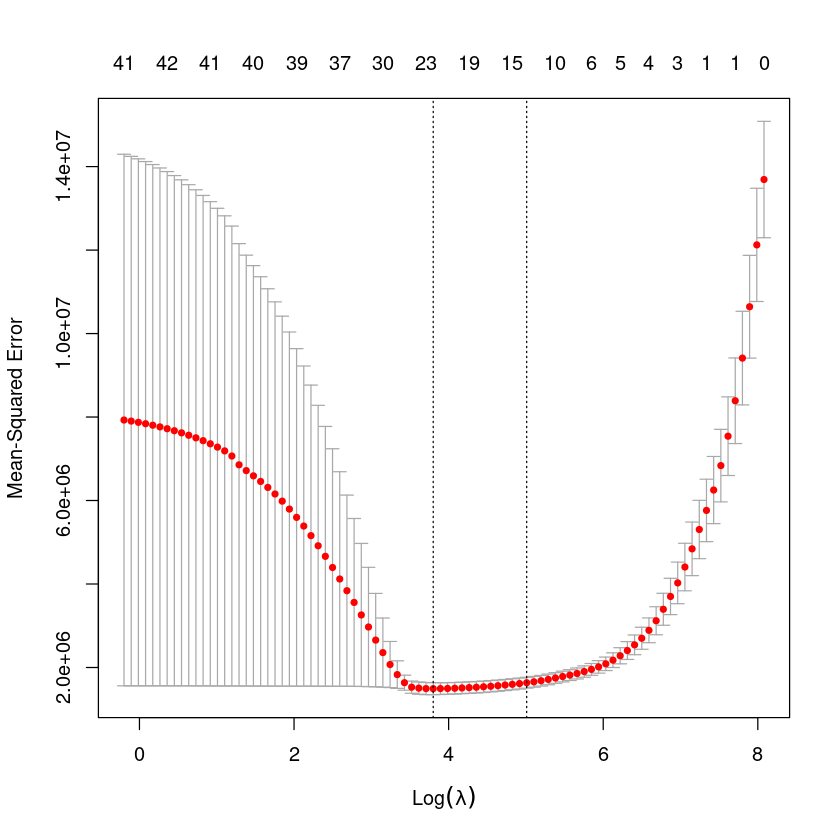

In [40]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min

In [41]:
#predicting using the best lambda with min sq error
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])

In [42]:
out=glmnet(x,y,alpha=1,lambda=grid)
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:43,]
lasso.coef

(Intercept)        Age_08_04        Mfg_Month               KM 
    10730.824513     -2076.889011      -269.276248      -642.392225 
 Fuel_TypeDiesel  Fuel_TypePetrol               HP        Met_Color 
        0.000000       105.633048       266.620869         0.000000 
      ColorBlack        ColorBlue       ColorGreen        ColorGrey 
        0.000000         0.000000       -47.412942        23.568172 
        ColorRed      ColorSilver      ColorViolet       ColorWhite 
        0.000000         0.000000         0.000000       -78.167549 
     ColorYellow        Automatic               cc            Doors 
        0.000000        23.208510         0.000000         0.000000 
           Gears    Quarterly_Tax           Weight    Mfr_Guarantee 
        1.601844       228.588216       643.453120        77.770703 
 BOVAG_Guarantee Guarantee_Period              ABS         Airbag_1 
       97.692485       173.583395       -38.833330         0.000000 
        Airbag_2            Airco  Automatic_airco    Boardcomputer 
        0.000000        66.248558       568.217243         0.000000 
       CD_Player     Central_Lock  Powered_Windows   Power_Steering 
       38.394531         0.000000       158.859971         0.000000 
           Radio        Mistlamps      Sport_Model Backseat_Divider 
        0.000000         0.000000        86.589182         0.000000 
    Metallic_Rim   Radio_cassette          Tow_Bar 
       48.050977         0.000000       -37.111805

## Principal Component Regression

In [43]:
install.packages('pls')
library(pls)

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




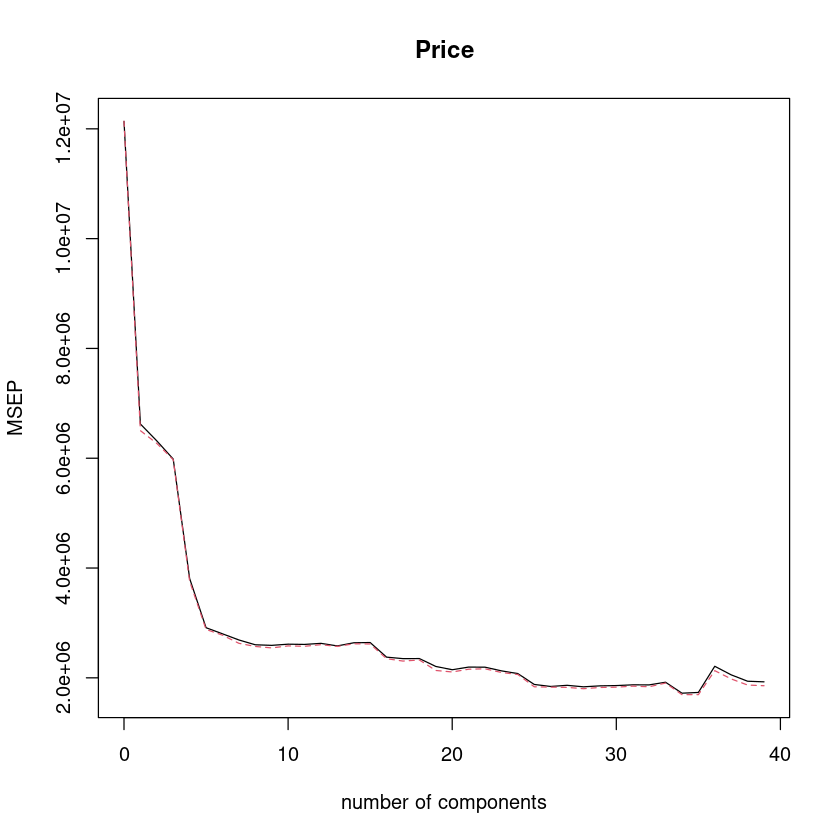

In [44]:
set.seed(1)
train=sample(1:nrow(toyota.df),nrow(toyota.df)/5)
test=(-train)

pcr.fit=pcr(Price~.,data=toyota.df,subset=train,scale=TRUE,validation="CV") 
validationplot(pcr.fit,val.type="MSEP")

In [45]:
summary(pcr.fit)

Data: 	X dimension: 287 39 
	Y dimension: 287 1
Fit method: svdpc
Number of components considered: 39

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3484     2573     2513     2446     1952     1707     1674
adjCV         3484     2550     2504     2444     1939     1698     1666
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1640     1613     1610      1616      1615      1621      1607
adjCV     1621     1603     1595      1607      1604      1614      1604
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV         1624      1626      1542      1533      1533      1486      1465
adjCV      1619      1618      1532      1518      1525      1461      1451
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV         1482      1481      1458      1441      1371      1357      1365
adjCV      1469    

In [62]:
#choose 35 components because it gives least squares
pcr.fit=pcr(Price~.,data=toyota.df,scale=TRUE,ncomp=35) 
summary(pcr.fit)

Data: 	X dimension: 1436 42 
	Y dimension: 1436 1
Fit method: svdpc
Number of components considered: 35
TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X        11.96    21.03    28.10    33.42    38.28    42.05    45.46    48.65
Price    54.17    54.18    63.67    78.35    78.42    81.21    81.31    81.92
       9 comps  10 comps  11 comps  12 comps  13 comps  14 comps  15 comps
X        51.71     54.71     57.52     60.26     62.90     65.46     67.95
Price    82.72     82.88     82.96     83.32     83.92     84.14     84.14
       16 comps  17 comps  18 comps  19 comps  20 comps  21 comps  22 comps
X         70.37     72.70     75.00     77.12     79.16     81.15     82.94
Price     84.25     84.27     84.55     85.18     85.44     85.45     86.03
       23 comps  24 comps  25 comps  26 comps  27 comps  28 comps  29 comps
X         84.65     86.31     87.92     89.38     90.79     92.04     93.22
Price     86.05     86.14 

## PLS

In [55]:
set.seed(1)
pls.fit=plsr(Price~.,data=toyota.df,subset=train,scale=TRUE,validation="CV") 
summary(pls.fit)

Data: 	X dimension: 287 39 
	Y dimension: 287 1
Fit method: kernelpls
Number of components considered: 39

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3484     1784     1396     1304     1301     1298     1307
adjCV         3484     1778     1387     1289     1282     1280     1291
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1305     1316     1323      1326      1325      1322      1323
adjCV     1288     1297     1303      1306      1304      1302      1303
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV         1324      1322      1318      1311      1304      1302      1303
adjCV      1303      1301      1297      1291      1284      1283      1283
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV         1304      1306      1307      1308      1309      1309      1309
adjCV      1285

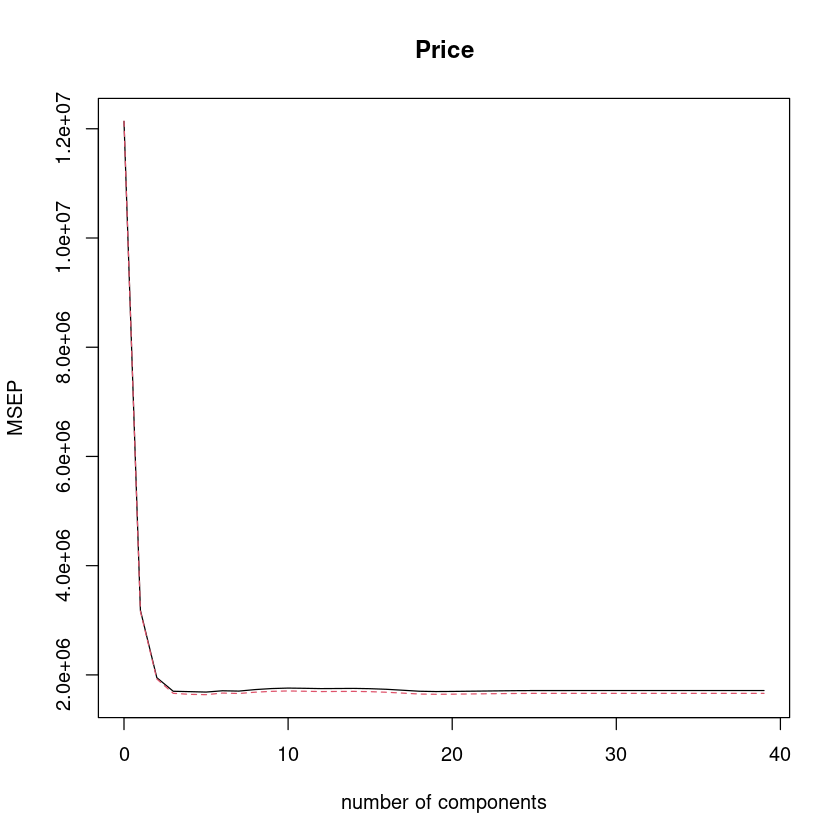

In [58]:
validationplot(pls.fit,val.type="MSEP")

In [63]:
#using m=2 according to the graph
pls.fit=plsr(Price~.,data=toyota.df,scale=TRUE,ncomp=2) 
summary(pls.fit)

Data: 	X dimension: 1436 42 
	Y dimension: 1436 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
       1 comps  2 comps
X        11.30    17.43
Price    77.17    86.64
